# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
sb.set_style("whitegrid")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349480 entries, 0 to 2349479
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 166
Occurred Date                        0
Occurred Time                       85
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21096
Address                             12
Zip Code                         14644
Council District                 47618
APD Sector                        9324
APD District                      9811
PRA                              11132
Census Tract                    420972
Clearance Status                612331
Clearance Date                  343144
UCR Category                   1545968
Category Description           1545968
X-coordinate                     10519
Y-coordinate                     10519
Latitude                         39874
Longitude                

Incident Number Highest Offense Description  Highest Offense Code  \
0      20191571574               FRAUD - OTHER                  1199   
1      20191550153              DEADLY CONDUCT                   408   
2      20195022816      THEFT OF LICENSE PLATE                   614   
3      20205007833               RUNAWAY CHILD                  4100   
4      20191671388       BURGLARY OF RESIDENCE                   500   

  Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
0               N  06/03/2019 04:00:00 PM    06/03/2019         1600.0   
1               N  06/04/2019 03:12:00 AM    06/04/2019          312.0   
2               N  06/03/2019 03:00:00 PM    06/03/2019         1500.0   
3               N  02/22/2020 06:00:00 PM    02/22/2020         1800.0   
4               N  06/14/2019 12:00:00 PM    06/14/2019         1200.0   

         Report Date Time Report Date  Report Time  \
0  06/06/2019 05:34:00 PM  06/06/2019       1734.0   
1  06/04/2019 03:16:00 AM  06/04/2019        316.0   
2  06/04/2019 03:22:00 PM  06/04/2019       1522.0   
3  02/24/2020 06:03:00 PM  02/24/2020       1803.0   
4  06/16/2019 10:00:00 PM  06/16/2019       2200.0   

                 Location Type                       Address  Zip Code  \
0  DEPARTMENT / DISCOUNT STORE            10817 BALLARD PATH   78717.0   
1             RESIDENCE / HOME          8312 N IH 35 SVRD SB   78753.0   
2             RESIDENCE / HOME                6312 LIBYAN DR   78745.0   
3             RESIDENCE / HOME            13012 DEARBONNE DR   78617.0   
4             RESIDENCE / HOME  3809 SPICEWOOD SPRINGS RD EB   78731.0   

   Council District APD Sector APD District    PRA  Census Tract  \
0               6.0         AD            5  573.0        203.11   
1               4.0         ED            1  250.0         18.06   
2               2.0         FR            4  509.0         24.09   
3               2.0         HE            7  612.0           NaN   
4              10.0         BA            8  256.0         17.51   

  Clearance Status Clearance Date UCR Category Category Description  \
0              NaN            NaN          NaN                  NaN   
1                N     06/06/2019          13A   Aggravated Assault   
2                N     06/04/2019          23G                Theft   
3                N     03/03/2020          NaN                  NaN   
4                N     09/18/2019          220             Burglary   

   X-coordinate  Y-coordinate   Latitude  Longitude  \
0     3097785.0     3097785.0  30.483646 -97.789495   
1     3128227.0     3128227.0  30.346646 -97.696573   
2     3098393.0     3098393.0  30.205267 -97.794900   
3     3155456.0     3155456.0  30.176140 -97.615031   
4     3111039.0     3111039.0  30.364987 -97.750587   

                      Location  
0   (30.48364631, -97.7894953)  
1  (30.34664576, -97.69657342)  
2  (30.20526729, -97.79490043)  
3   (30.17613952, -97.6150307)  
4  (30.36498691, -97.75058749)

Incident Number  Highest Offense Description  Highest Offense Code  \
2349475      20143631822           FAMILY DISTURBANCE                  3400   
2349476      20191270738         THEFT BY SHOPLIFTING                   607   
2349477       2008501470  CRIMINAL TRESPASS/TRANSIENT                  2721   
2349478    2003921400113                          DWI                  2100   
2349479      20081340129    URINATING IN PUBLIC PLACE                  3212   

        Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
2349475               N  12/29/2014 11:41:00 PM    12/29/2014         2341.0   
2349476               N  05/07/2019 10:50:00 AM    05/07/2019         1050.0   
2349477               N  02/19/2008 05:00:00 PM    02/19/2008         1700.0   
2349478               N  05/20/2003 01:32:00 AM    05/20/2003          132.0   
2349479               N  05/13/2008 01:10:00 AM    05/13/2008          110.0   

               Report Date Time Report Date  Report Time  \
2349475  12/29/2014 11:41:00 PM  12/29/2014       2341.0   
2349476  05/07/2019 11:31:00 AM  05/07/2019       1131.0   
2349477  02/19/2008 05:00:00 PM  02/19/2008       1700.0   
2349478  05/20/2003 01:32:00 AM  05/20/2003        132.0   
2349479  05/13/2008 01:10:00 AM  05/13/2008        110.0   

                        Location Type               Address  Zip Code  \
2349475              RESIDENCE / HOME    109 MASTERSON PASS   78753.0   
2349476   DEPARTMENT / DISCOUNT STORE    11423 N LAMAR BLVD   78753.0   
2349477         PARKING LOTS / GARAGE       6800 BERKMAN DR   78723.0   
2349478  STREETS / HWY / ROAD / ALLEY  4500 N MOPAC EXPY NB   78731.0   
2349479  STREETS / HWY / ROAD / ALLEY    400 BLOCK E 6TH ST   78701.0   

         Council District APD Sector APD District    PRA  Census Tract  \
2349475               4.0         ED            1  240.0         18.23   
2349476               7.0         ED            4  221.0         18.24   
2349477               1.0         ID            5  293.0         21.00   
2349478              10.0         BA            6  325.0          1.00   
2349479               9.0         GE            2  382.0         11.00   

        Clearance Status Clearance Date UCR Category Category Description  \
2349475                N     01/02/2015          NaN                  NaN   
2349476              NaN            NaN          23C                Theft   
2349477              NaN            NaN          NaN                  NaN   
2349478                C     05/22/2003          NaN                  NaN   
2349479                C     05/17/2008          NaN                  NaN   

         X-coordinate  Y-coordinate   Latitude  Longitude  \
2349475     3130776.0     3130776.0  30.369795 -97.687855   
2349476     3131578.0     3131578.0  30.383630 -97.684932   
2349477     3130390.0     3130390.0  30.320281 -97.690437   
2349478     3109748.0     3109748.0  30.320565 -97.755869   
2349479     3115491.0     3115491.0  30.267351 -97.739093   

                            Location  
2349475  (30.36979494, -97.68785533)  
2349476  (30.38362955, -97.68493154)  
2349477   (30.32028083, -97.6904366)  
2349478   (30.32056515, -97.7558693)  
2349479  (30.26735144, -97.73909331)

## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
def clean_data(df):
    drop_col = [
        "Highest Offense Code",
        "Incident Number",
        "Occurred Time",
        "Occurred Date",
        "Report Date",
        "Report Time",
        "UCR Category",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "pra",
        "census_tract",
        "location_type",
        "apd_district",
        "apd_sector",
        "clearance_status",
        "category_description",
    ]
    df[fillna].fillna("Unknown", inplace=True)

    date_col = ["occurred_date_time", "report_date_time", "clearance_date"]

    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "pra",
        "census_tract",
        "category_description",
    ]

    df.family_violence = df.family_violence.replace({"Y": "True", "N": "False"})
    df.clearance_status = df.clearance_status.replace(
        {"C": "True", "O": "True", "N": "False"}
    )

    df[cat_col] = df[cat_col].astype("category")

    df[date_col] = df[date_col].astype("datetime64")

    df["year"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.day
    df["hour"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.hour

    df.set_index(["occurred_date_time"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [7]:
df.duplicated().sum()

708

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
# Re-examining the dataframe
display(df.info())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2348772 entries, 2003-01-01 00:00:00 to NaT
Data columns (total 21 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   pra                          category      
 10  census_tract                 category      
 11  clearance_status             object        
 12  clearance_date               datetime64[ns]
 13  category_description         category      
 14  latitude                     float64       
 15  longitude                    flo

None

highest_offense_description family_violence  \
occurred_date_time                                               
2003-01-01                      IDENTITY THEFT           False   
2003-01-01                      IDENTITY THEFT           False   
2003-01-01                      IDENTITY THEFT           False   
2003-01-01                      IDENTITY THEFT           False   
2003-01-01                      IDENTITY THEFT           False   

                      report_date_time     location_type  \
occurred_date_time                                         
2003-01-01         2012-05-25 11:04:00  RESIDENCE / HOME   
2003-01-01         2009-08-07 14:23:00  RESIDENCE / HOME   
2003-01-01         2008-05-10 18:36:00  RESIDENCE / HOME   
2003-01-01         2003-10-06 10:52:00  RESIDENCE / HOME   
2003-01-01         2010-04-14 14:59:00  RESIDENCE / HOME   

                                    address zip_code council_district  \
occurred_date_time                                                      
2003-01-01                    1105 LILY TER  78741.0              3.0   
2003-01-01                  6800 MC NEIL DR  78729.0              6.0   
2003-01-01          7312 WHISPERING OAKS DR  78745.0              5.0   
2003-01-01               5708 WHITEBROOK DR  78724.0              1.0   
2003-01-01                    1088 PARK PLZ  78753.0              4.0   

                   apd_sector apd_district    pra census_tract  \
occurred_date_time                                               
2003-01-01                 HE            3  443.0          NaN   
2003-01-01                 AD            4  169.0        204.1   
2003-01-01                 FR            1  525.0          NaN   
2003-01-01                 CH            7  300.0         22.0   
2003-01-01                 ED            3  251.0          NaN   

                   clearance_status clearance_date category_description  \
occurred_date_time                                                        
2003-01-01                    False     2012-05-25                  NaN   
2003-01-01                      NaN            NaT                  NaN   
2003-01-01                      NaN     2008-05-13                  NaN   
2003-01-01                      NaN     2003-10-31                  NaN   
2003-01-01                     True     2010-04-15                  NaN   

                     latitude  longitude    year  month  week  day  hour  
occurred_date_time                                                        
2003-01-01          30.234098 -97.701901  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.438983 -97.759669  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.202175 -97.817542  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.305744 -97.655117  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.348871 -97.685233  2003.0    1.0   1.0  1.0   0.0

highest_offense_description family_violence  \
occurred_date_time                                                 
NaT                            SUSPICIOUS PERSON           False   
NaT                            SUSPICIOUS PERSON           False   
NaT                 POSS CONTROLLED SUB/NARCOTIC           False   
NaT                                RUNAWAY CHILD           False   
NaT                          BURGLARY OF VEHICLE           False   

                      report_date_time     location_type  \
occurred_date_time                                         
NaT                2005-05-24 20:14:00               NaN   
NaT                2008-01-11 10:33:00               NaN   
NaT                2007-04-04 18:39:00               NaN   
NaT                2004-02-24 22:55:00               NaN   
NaT                2003-05-06 10:47:00  RESIDENCE / HOME   

                                        address zip_code council_district  \
occurred_date_time                                                          
NaT                            8200 GEORGIAN DR  78753.0              4.0   
NaT                 SAN JACINTO BLVD / E 4TH ST  78701.0              9.0   
NaT                                1511 FARO DR  78741.0              3.0   
NaT                           400 W LIVE OAK ST  78704.0              9.0   
NaT                         1908 SAN ANTONIO ST  78705.0              9.0   

                   apd_sector apd_district    pra census_tract  \
occurred_date_time                                               
NaT                        ED            1  250.0        18.00   
NaT                        GE            2  381.0        11.00   
NaT                        HE            3  442.0        23.17   
NaT                        DA            1  476.0        13.00   
NaT                        BA            1  359.0         6.00   

                   clearance_status clearance_date category_description  \
occurred_date_time                                                        
NaT                           False     2005-06-28                  NaN   
NaT                             NaN     2008-01-16                  NaN   
NaT                           False     2007-07-25                  NaN   
NaT                           False     2004-02-25                  NaN   
NaT                           False            NaT                Theft   

                     latitude  longitude  year  month  week  day  hour  
occurred_date_time                                                      
NaT                 30.347657 -97.703221   NaN    NaN   NaN  NaN   NaN  
NaT                 30.265527 -97.741069   NaN    NaN   NaN  NaN   NaN  
NaT                 30.235041 -97.713595   NaN    NaN   NaN  NaN   NaN  
NaT                 30.243872 -97.755879   NaN    NaN   NaN  NaN   NaN  
NaT                 30.282945 -97.743406   NaN    NaN   NaN  NaN   NaN

## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

zip_code
78741.0    210317
78753.0    182632
78701.0    171082
78758.0    162995
78704.0    157590
78745.0    153671
78702.0    138728
78744.0    128726
78723.0    120737
78752.0     86174
78748.0     69684
78759.0     67949
78751.0     65375
78757.0     59048
78705.0     58287
78721.0     48551
78749.0     41221
78724.0     38433
78727.0     36753
78703.0     35917
78731.0     29447
78746.0     28617
78729.0     25967
78750.0     24317
78754.0     23647

zip_code
78741.0  0.090105
78753.0  0.078244
78701.0  0.073296
78758.0  0.069831
78704.0  0.067515
78745.0  0.065836
78702.0  0.059435
78744.0  0.055149
78723.0  0.051727
78752.0  0.036919
78748.0  0.029854
78759.0  0.029111
78751.0  0.028008
78757.0  0.025298
78705.0  0.024972
78721.0  0.020800
78749.0  0.017660
78724.0  0.016466
78727.0  0.015746
78703.0  0.015388
78731.0  0.012616
78746.0  0.012260
78729.0  0.011125
78750.0  0.010418
78754.0  0.010131

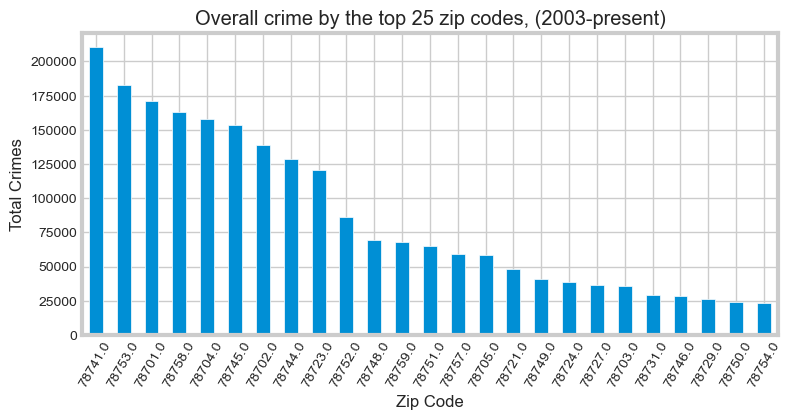

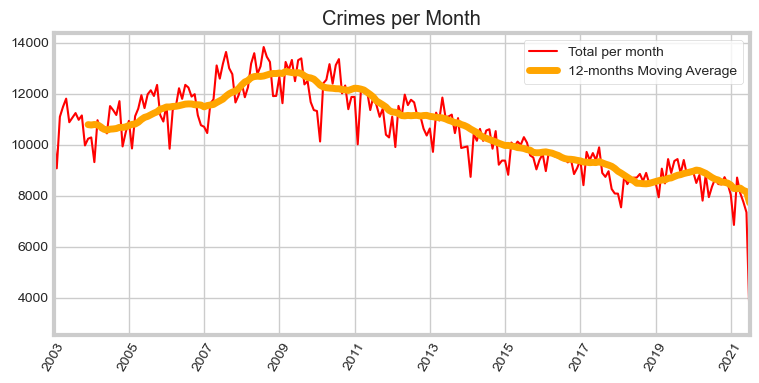

In [10]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25).to_frame())
display(df.zip_code.value_counts(normalize=True).head(25).to_frame())

# Visualizing the top 25 crime-ridden zip codes in Austin
plt.figure(figsize=(8, 4), dpi=100)
df.zip_code.value_counts().head(25).plot.bar(
    title="Overall crime by the top 25 zip codes, (2003-present)",
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 4), dpi=100)
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange",
    linewidth=5,
    label="12-months Moving Average",
    title="Crimes per Month",
    xlabel="",
    rot=60,
)
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

highest_offense_description
BURGLARY OF VEHICLE                                  233149
THEFT                                                214467
FAMILY DISTURBANCE                                   184251
CRIMINAL MISCHIEF                                    129727
ASSAULT W/INJURY-FAM/DATE VIOL                        79522
BURGLARY OF RESIDENCE                                 77906
DWI                                                   70355
PUBLIC INTOXICATION                                   69121
HARASSMENT                                            65255
DISTURBANCE - OTHER                                   62759

BURGLARY OF VEHICLE  CRIMINAL MISCHIEF  \
occurred_date_time                                           
2003-01-31                         1225                722   
2003-02-28                         1110                594   
2003-03-31                         1222                700   
2003-04-30                         1396                709   
2003-05-31                         1487                750   
...                                 ...                ...   
2021-03-31                          431                431   
2021-04-30                          370                419   
2021-05-31                          348                397   
2021-06-30                          351                372   
2021-07-31                          155                141   

                    ASSAULT W/INJURY-FAM/DATE VIOL  BURGLARY OF RESIDENCE  \
occurred_date_time                                                          
2003-01-31                                     349                    328   
2003-02-28                                     342                    248   
2003-03-31                                     421                    393   
2003-04-30                                     432                    398   
2003-05-31                                     424                    436   
...                                            ...                    ...   
2021-03-31                                     260                    154   
2021-04-30                                     268                    127   
2021-05-31                                     313                    155   
2021-06-30                                     268                    143   
2021-07-31                                     136                     70   

                    HARASSMENT  PUBLIC INTOXICATION  DWI  FAMILY DISTURBANCE  \
occurred_date_time                                                             
2003-01-31                 293                  341  408                 505   
2003-02-28                 309                  354  328                 500   
2003-03-31                 363                  450  406                 546   
2003-04-30                 353                  385  375                 678   
2003-05-31                 345                  451  418                 650   
...                        ...                  ...  ...                 ...   
2021-03-31                 196                   75  179                 877   
2021-04-30                 171                   67  126                 799   
2021-05-31                 146                   61  133                 885   
2021-06-30                 158                   70  126                 799   
2021-07-31                  41                   31   59                 384   

                    TOTAL  
occurred_date_time         
2003-01-31           4171  
2003-02-28           3785  
2003-03-31           4501  
2003-04-30           4726  
2003-05-31           4961  
...                   ...  
2021-03-31           2603  
2021-04-30           2347  
2021-05-31           2438  
2021-06-30           2287  
2021-07-31           1017  

[223 rows x 9 columns]

<Figure size 432x288 with 0 Axes>

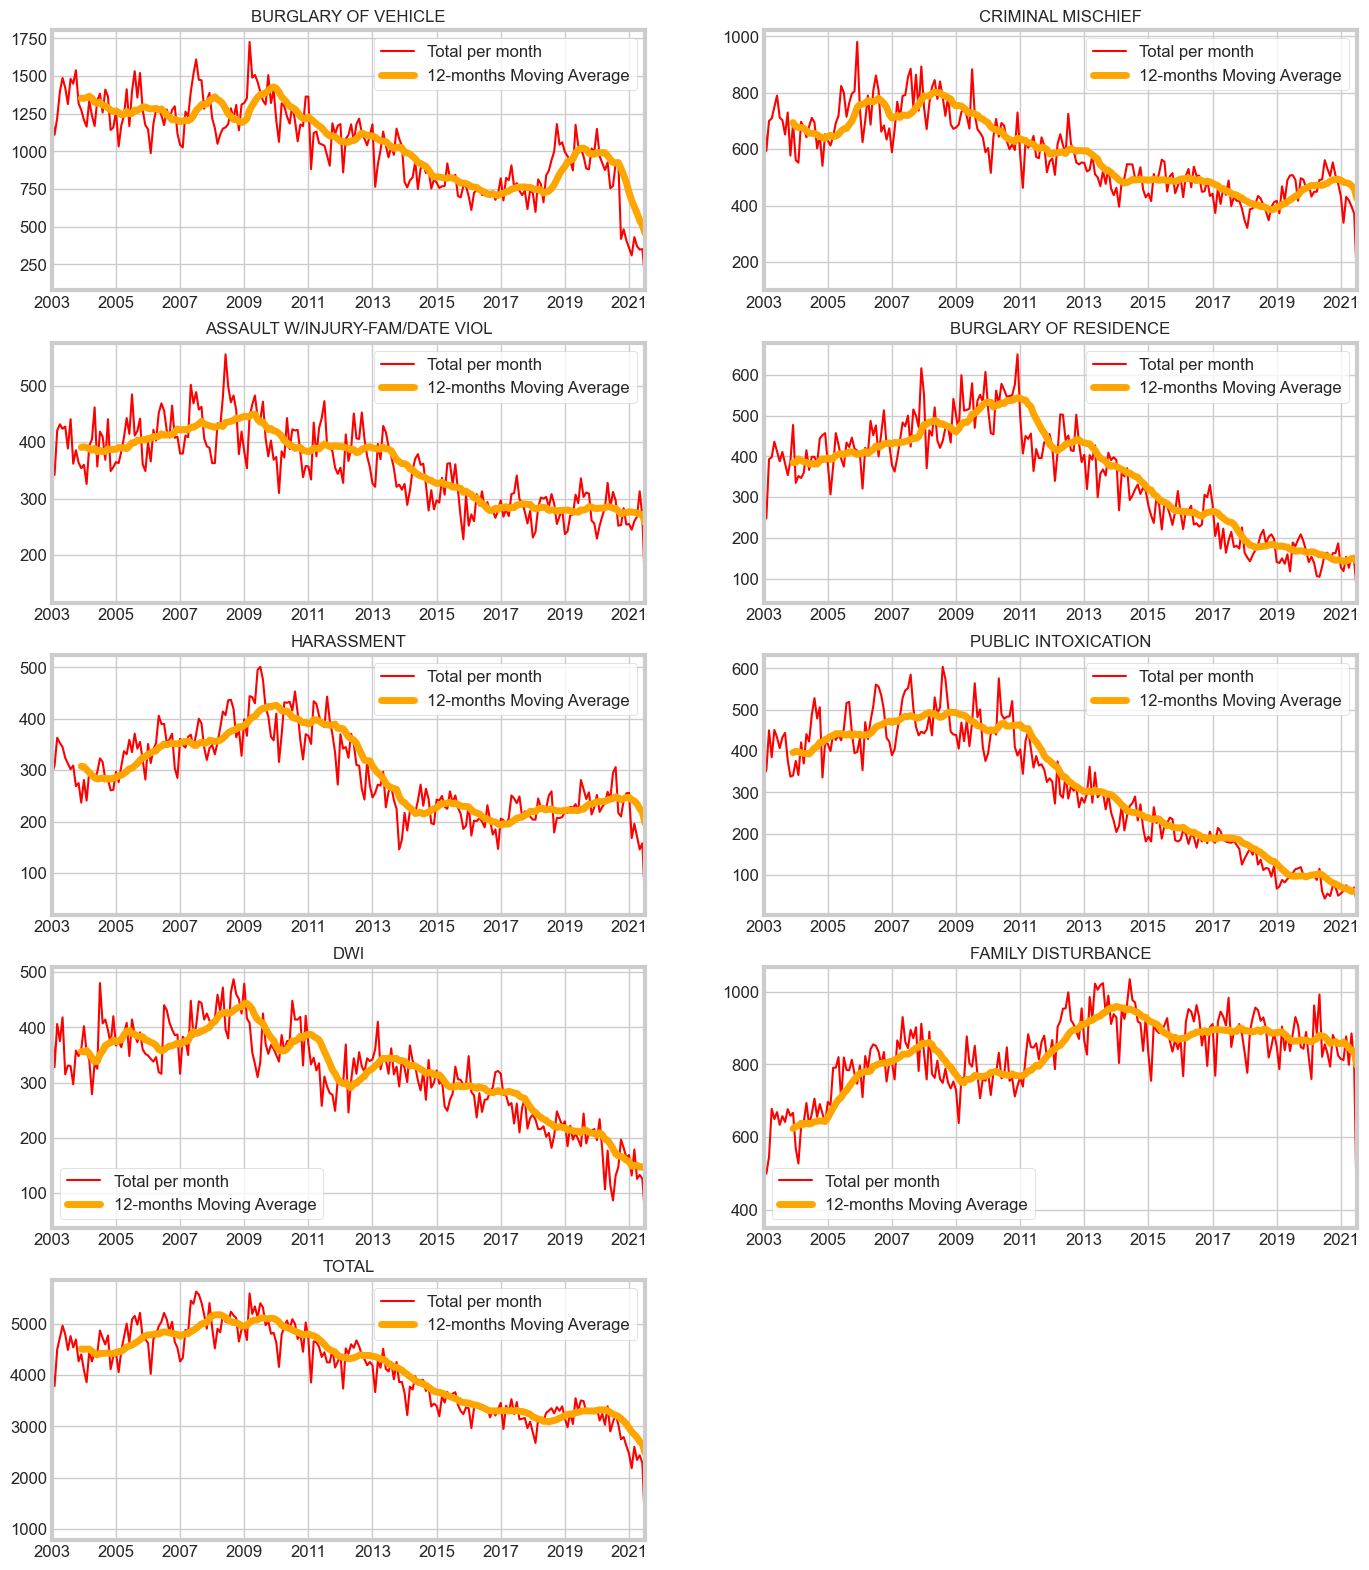

In [11]:
display(df["highest_offense_description"].value_counts().head(10).to_frame())

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly)

plt.figure(1)
plt.figure(figsize=(15, 20), dpi=100)

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

highest_offense_description
PUBLIC INTOXICATION                                   17233
THEFT                                                 16006
BURGLARY OF VEHICLE                                    9387
WARRANT ARREST NON TRAFFIC                             8970
DWI                                                    8362
ASSAULT WITH INJURY                                    7699
VIOL CITY ORDINANCE - OTHER                            6193
POSS OF DRUG PARAPHERNALIA                             6111
CRIMINAL MISCHIEF                                      5965
CRIMINAL TRESPASS                                      3988
DISTURBANCE - OTHER                                    3418
POSSESSION OF MARIJUANA                                3415
CUSTODY ARREST TRAFFIC WARR                            2993
POSS CONTROLLED SUB/NARCOTIC                           2937
CAMPING IN PARK                                        2785
VOCO - ALCOHOL  CONSUMPTION                            2690
ASSAULT BY CONTACT                                     2662
CRIMINAL TRESPASS/TRANSIENT                            2597
THEFT OF BICYCLE                                       2563
URINATING IN PUBLIC PLACE                              2339
FAMILY DISTURBANCE                                     2233
DOC FIGHTING                                           2152
PROTECTIVE ORDER                                       2099
ASSAULT W/INJURY-FAM/DATE VIOL                         1752

highest_offense_description
PUBLIC INTOXICATION                                0.100729
THEFT                                              0.093557
BURGLARY OF VEHICLE                                0.054868
WARRANT ARREST NON TRAFFIC                         0.052431
DWI                                                0.048877
ASSAULT WITH INJURY                                0.045002
VIOL CITY ORDINANCE - OTHER                        0.036199
POSS OF DRUG PARAPHERNALIA                         0.035720
CRIMINAL MISCHIEF                                  0.034866
CRIMINAL TRESPASS                                  0.023310
DISTURBANCE - OTHER                                0.019979
POSSESSION OF MARIJUANA                            0.019961
CUSTODY ARREST TRAFFIC WARR                        0.017495
POSS CONTROLLED SUB/NARCOTIC                       0.017167
CAMPING IN PARK                                    0.016279
VOCO - ALCOHOL  CONSUMPTION                        0.015723
ASSAULT BY CONTACT                                 0.015560
CRIMINAL TRESPASS/TRANSIENT                        0.015180
THEFT OF BICYCLE                                   0.014981
URINATING IN PUBLIC PLACE                          0.013672
FAMILY DISTURBANCE                                 0.013052
DOC FIGHTING                                       0.012579
PROTECTIVE ORDER                                   0.012269
ASSAULT W/INJURY-FAM/DATE VIOL                     0.010241

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

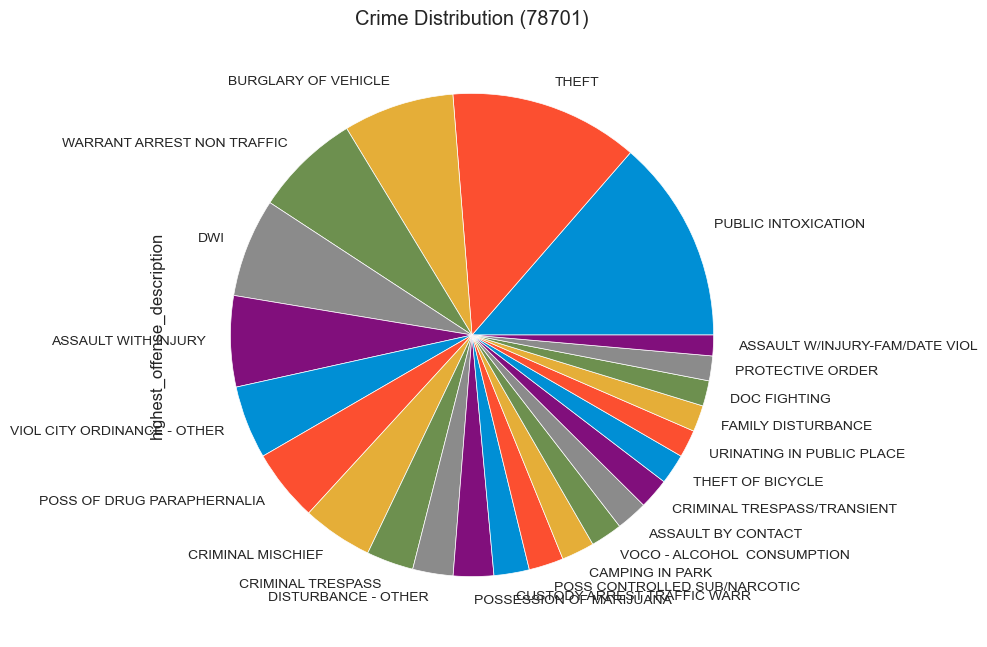

In [12]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off.to_frame())
display(
    df_01.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

highest_offense_description
THEFT                                                 17337
BURGLARY OF VEHICLE                                   16063
FAMILY DISTURBANCE                                    15050
CRIMINAL MISCHIEF                                      9628
THEFT BY SHOPLIFTING                                   7726
ASSAULT W/INJURY-FAM/DATE VIOL                         7312
BURGLARY OF RESIDENCE                                  6130
DWI                                                    5110
DISTURBANCE - OTHER                                    4870
AUTO THEFT                                             4379
CUSTODY ARREST TRAFFIC WARR                            4364
HARASSMENT                                             4330
POSS OF DRUG PARAPHERNALIA                             3746
ASSAULT WITH INJURY                                    3414
PUBLIC INTOXICATION                                    3391
CRIMINAL TRESPASS                                      3198
POSS CONTROLLED SUB/NARCOTIC                           3029
RUNAWAY CHILD                                          2976
WARRANT ARREST NON TRAFFIC                             2802
POSSESSION OF MARIJUANA                                2726
BURGLARY NON RESIDENCE                                 2534
VIOL CITY ORDINANCE - OTHER                            1874

----------------------------------


highest_offense_description
THEFT                                              0.094929
BURGLARY OF VEHICLE                                0.087953
FAMILY DISTURBANCE                                 0.082406
CRIMINAL MISCHIEF                                  0.052718
THEFT BY SHOPLIFTING                               0.042304
ASSAULT W/INJURY-FAM/DATE VIOL                     0.040037
BURGLARY OF RESIDENCE                              0.033565
DWI                                                0.027980
DISTURBANCE - OTHER                                0.026666
AUTO THEFT                                         0.023977
CUSTODY ARREST TRAFFIC WARR                        0.023895
HARASSMENT                                         0.023709
POSS OF DRUG PARAPHERNALIA                         0.020511
ASSAULT WITH INJURY                                0.018693
PUBLIC INTOXICATION                                0.018567
CRIMINAL TRESPASS                                  0.017511
POSS CONTROLLED SUB/NARCOTIC                       0.016585
RUNAWAY CHILD                                      0.016295
WARRANT ARREST NON TRAFFIC                         0.015342
POSSESSION OF MARIJUANA                            0.014926
BURGLARY NON RESIDENCE                             0.013875
VIOL CITY ORDINANCE - OTHER                        0.010261

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

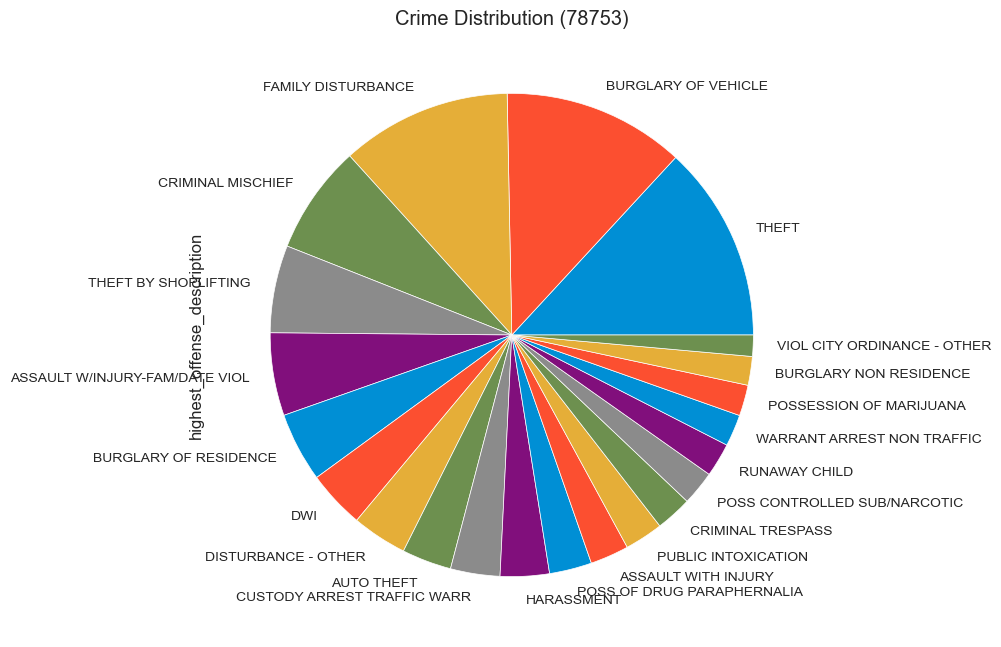

In [13]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_53_off.to_frame())
print("----------------------------------")
display(
    df_53.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)

plt.figure(dpi=100)
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

highest_offense_description
FAMILY DISTURBANCE                                    20785
BURGLARY OF VEHICLE                                   19984
THEFT                                                 15801
CRIMINAL MISCHIEF                                     11195
ASSAULT W/INJURY-FAM/DATE VIOL                         9764
BURGLARY OF RESIDENCE                                  8983
PUBLIC INTOXICATION                                    6405
CUSTODY ARREST TRAFFIC WARR                            6011
DWI                                                    5723
HARASSMENT                                             5607
DISTURBANCE - OTHER                                    5254
AUTO THEFT                                             4775
ASSAULT WITH INJURY                                    4614
CRIMINAL TRESPASS                                      4007
POSS CONTROLLED SUB/NARCOTIC                           3923
POSSESSION OF MARIJUANA                                3810
THEFT BY SHOPLIFTING                                   3608
POSS OF DRUG PARAPHERNALIA                             3559
WARRANT ARREST NON TRAFFIC                             3448
RUNAWAY CHILD                                          2817
VIOL CITY ORDINANCE - OTHER                            2197

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.098827
BURGLARY OF VEHICLE                                0.095018
THEFT                                              0.075129
CRIMINAL MISCHIEF                                  0.053229
ASSAULT W/INJURY-FAM/DATE VIOL                     0.046425
BURGLARY OF RESIDENCE                              0.042712
PUBLIC INTOXICATION                                0.030454
CUSTODY ARREST TRAFFIC WARR                        0.028581
DWI                                                0.027211
HARASSMENT                                         0.026660
DISTURBANCE - OTHER                                0.024981
AUTO THEFT                                         0.022704
ASSAULT WITH INJURY                                0.021938
CRIMINAL TRESPASS                                  0.019052
POSS CONTROLLED SUB/NARCOTIC                       0.018653
POSSESSION OF MARIJUANA                            0.018116
THEFT BY SHOPLIFTING                               0.017155
POSS OF DRUG PARAPHERNALIA                         0.016922
WARRANT ARREST NON TRAFFIC                         0.016394
RUNAWAY CHILD                                      0.013394
VIOL CITY ORDINANCE - OTHER                        0.010446

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

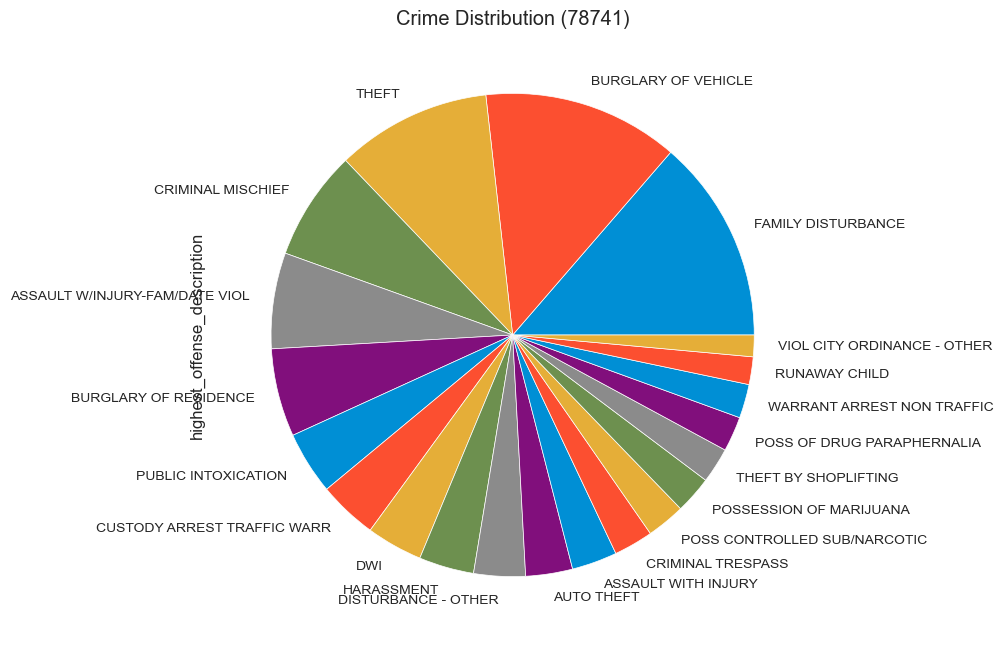

In [14]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
display(df_41_off.to_frame())
print("----------------------------------")
display(
    df_41.highest_offense_description.value_counts(normalize=True).head(21).to_frame()
)
plt.figure(dpi=100)
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

highest_offense_description
FAMILY DISTURBANCE                                    15300
BURGLARY OF VEHICLE                                   14813
THEFT                                                 13712
CRIMINAL MISCHIEF                                      8663
BURGLARY OF RESIDENCE                                  5901
ASSAULT W/INJURY-FAM/DATE VIOL                         5847
HARASSMENT                                             5194
DISTURBANCE - OTHER                                    4596
DWI                                                    4465
PUBLIC INTOXICATION                                    4020
CUSTODY ARREST TRAFFIC WARR                            3248
AUTO THEFT                                             2951
BURGLARY NON RESIDENCE                                 2909
ASSAULT WITH INJURY                                    2750
RUNAWAY CHILD                                          2627
POSSESSION OF MARIJUANA                                2600
WARRANT ARREST NON TRAFFIC                             2113
POSS CONTROLLED SUB/NARCOTIC                           2065
THEFT BY SHOPLIFTING                                   2032
CRIMINAL TRESPASS                                      1997
IDENTITY THEFT                                         1686
POSS OF DRUG PARAPHERNALIA                             1533

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.099563
BURGLARY OF VEHICLE                                0.096394
THEFT                                              0.089230
CRIMINAL MISCHIEF                                  0.056374
BURGLARY OF RESIDENCE                              0.038400
ASSAULT W/INJURY-FAM/DATE VIOL                     0.038049
HARASSMENT                                         0.033799
DISTURBANCE - OTHER                                0.029908
DWI                                                0.029056
PUBLIC INTOXICATION                                0.026160
CUSTODY ARREST TRAFFIC WARR                        0.021136
AUTO THEFT                                         0.019203
BURGLARY NON RESIDENCE                             0.018930
ASSAULT WITH INJURY                                0.017895
RUNAWAY CHILD                                      0.017095
POSSESSION OF MARIJUANA                            0.016919
WARRANT ARREST NON TRAFFIC                         0.013750
POSS CONTROLLED SUB/NARCOTIC                       0.013438
THEFT BY SHOPLIFTING                               0.013223
CRIMINAL TRESPASS                                  0.012995
IDENTITY THEFT                                     0.010971
POSS OF DRUG PARAPHERNALIA                         0.009976

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

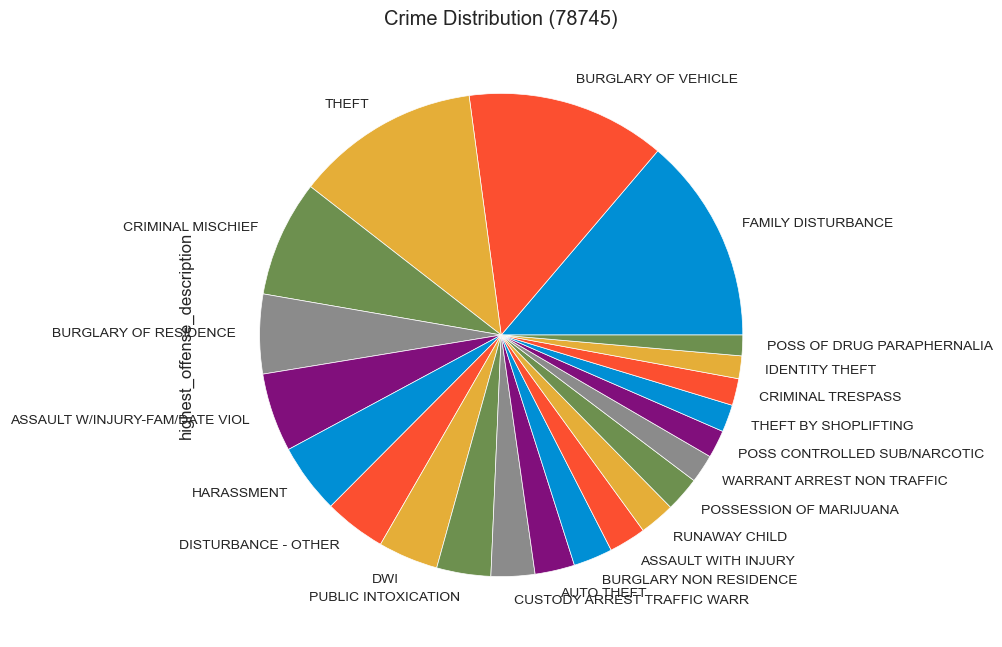

In [15]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
display(df_45_off.to_frame())
print("----------------------------------")
display(
    df_45.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

highest_offense_description
BURGLARY OF VEHICLE                                    8723
THEFT                                                  5677
CRIMINAL MISCHIEF                                      5024
THEFT OF BICYCLE                                       3552
PUBLIC INTOXICATION                                    2642
BURGLARY OF RESIDENCE                                  2142
WARRANT ARREST NON TRAFFIC                             1563
AUTO THEFT                                             1394
CRIMINAL TRESPASS                                      1378
ASSAULT WITH INJURY                                    1281
HARASSMENT                                             1242
FAMILY DISTURBANCE                                     1239
DWI                                                    1229
DISTURBANCE - OTHER                                    1133
BURGLARY NON RESIDENCE                                  895
CRIMINAL TRESPASS/TRANSIENT                             871
VIOL CITY ORDINANCE - OTHER                             798
GRAFFITI                                                785
CUSTODY ARREST TRAFFIC WARR                             783
ASSAULT W/INJURY-FAM/DATE VIOL                          715
POSSESSION OF MARIJUANA                                 669
ASSAULT BY CONTACT                                      633

'----------------------------------'

highest_offense_description
BURGLARY OF VEHICLE                                0.149656
THEFT                                              0.097397
CRIMINAL MISCHIEF                                  0.086194
THEFT OF BICYCLE                                   0.060940
PUBLIC INTOXICATION                                0.045327
BURGLARY OF RESIDENCE                              0.036749
WARRANT ARREST NON TRAFFIC                         0.026816
AUTO THEFT                                         0.023916
CRIMINAL TRESPASS                                  0.023642
ASSAULT WITH INJURY                                0.021977
HARASSMENT                                         0.021308
FAMILY DISTURBANCE                                 0.021257
DWI                                                0.021085
DISTURBANCE - OTHER                                0.019438
BURGLARY NON RESIDENCE                             0.015355
CRIMINAL TRESPASS/TRANSIENT                        0.014943
VIOL CITY ORDINANCE - OTHER                        0.013691
GRAFFITI                                           0.013468
CUSTODY ARREST TRAFFIC WARR                        0.013434
ASSAULT W/INJURY-FAM/DATE VIOL                     0.012267
POSSESSION OF MARIJUANA                            0.011478
ASSAULT BY CONTACT                                 0.010860

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

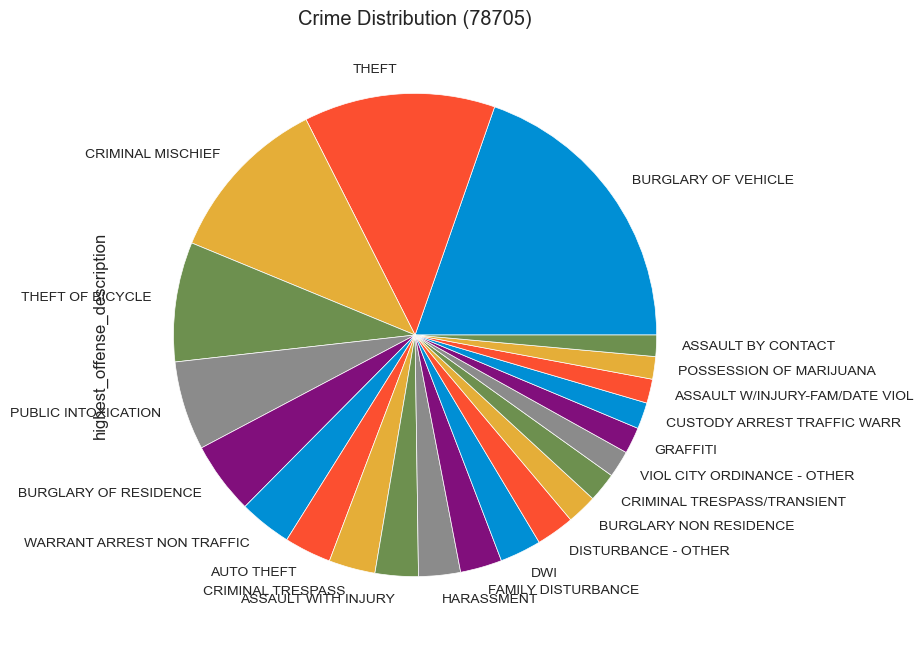

In [16]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off.to_frame())
display("----------------------------------")
display(
    df_05.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

highest_offense_description
BURGLARY OF VEHICLE                                    5451
THEFT                                                  5120
THEFT BY SHOPLIFTING                                   2565
CRIMINAL MISCHIEF                                      1286
DWI                                                     893
FAMILY DISTURBANCE                                      779
VIOL CITY ORDINANCE - OTHER                             652
HARASSMENT                                              639
AUTO THEFT                                              617
BURGLARY OF RESIDENCE                                   524
THEFT FROM PERSON                                       462
IDENTITY THEFT                                          456
DISTURBANCE - OTHER                                     442
BURGLARY NON RESIDENCE                                  359
ASSAULT W/INJURY-FAM/DATE VIOL                          343
CRED CARD ABUSE - OTHER                                 332
PUBLIC INTOXICATION                                     323
POSSESSION OF MARIJUANA                                 297
FRAUD - OTHER                                           285
SUSPICIOUS PERSON                                       259
CUSTODY ARREST TRAFFIC WARR                             247
WARRANT ARREST NON TRAFFIC                              223
ASSAULT WITH INJURY                                     202
VIOL WATER SAFETY ACT                                   195

highest_offense_description
BURGLARY OF VEHICLE                                0.190481
THEFT                                              0.178915
THEFT BY SHOPLIFTING                               0.089632
CRIMINAL MISCHIEF                                  0.044938
DWI                                                0.031205
FAMILY DISTURBANCE                                 0.027222
VIOL CITY ORDINANCE - OTHER                        0.022784
HARASSMENT                                         0.022329
AUTO THEFT                                         0.021561
BURGLARY OF RESIDENCE                              0.018311
THEFT FROM PERSON                                  0.016144
IDENTITY THEFT                                     0.015935
DISTURBANCE - OTHER                                0.015445
BURGLARY NON RESIDENCE                             0.012545
ASSAULT W/INJURY-FAM/DATE VIOL                     0.011986
CRED CARD ABUSE - OTHER                            0.011601
PUBLIC INTOXICATION                                0.011287
POSSESSION OF MARIJUANA                            0.010378
FRAUD - OTHER                                      0.009959
SUSPICIOUS PERSON                                  0.009051
CUSTODY ARREST TRAFFIC WARR                        0.008631
WARRANT ARREST NON TRAFFIC                         0.007793
ASSAULT WITH INJURY                                0.007059
VIOL WATER SAFETY ACT                              0.006814

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

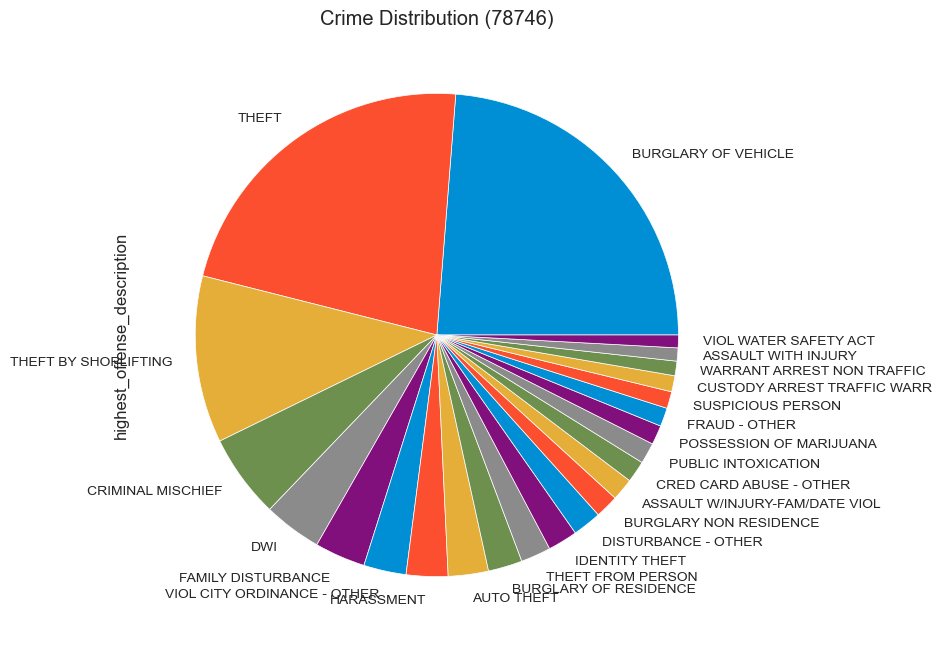

In [17]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off.to_frame())
display(
    df_46.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes istributed? 

In [18]:
# Creating separate dataframes for violent crime & murder rates
df_viol = df.query(
    'category_description == ["Aggravated Assault", "Robbery", "Rape", "Murder"]'
)
df_mur = df[df.category_description == "Murder"]
df_agg_asslt = df[df.category_description == "Aggravated Assault"]
df_robbery = df[df.category_description == "Robbery"]
df_rape = df[df.category_description == "Rape"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]
df_21 = df[df.year == 2021]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]
df_viol_21 = df_viol[df_viol.year == 2021]

# Annual murders
df_mur_17 = df_mur[df_mur.year == 2017]
df_mur_18 = df_mur[df_mur.year == 2018]
df_mur_19 = df_mur[df_mur.year == 2019]
df_mur_20 = df_mur[df_mur.year == 2020]
df_mur_21 = df_mur[df_mur.year == 2021]

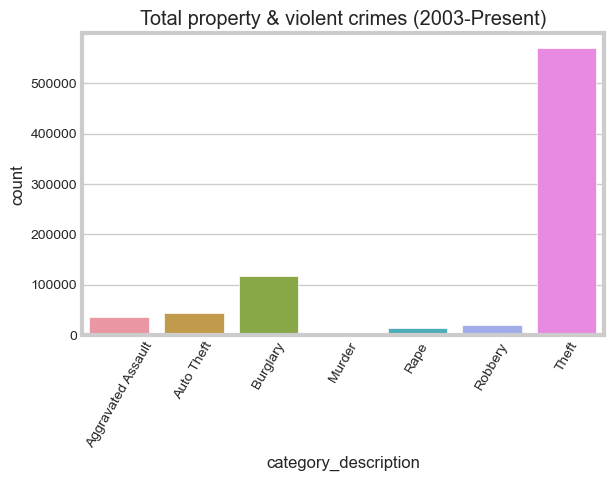

Theft                 570228
Burglary              117316
Auto Theft             45169
Aggravated Assault     35799
Robbery                20472
Rape                   13583
Murder                   558
Name: category_description, dtype: int64

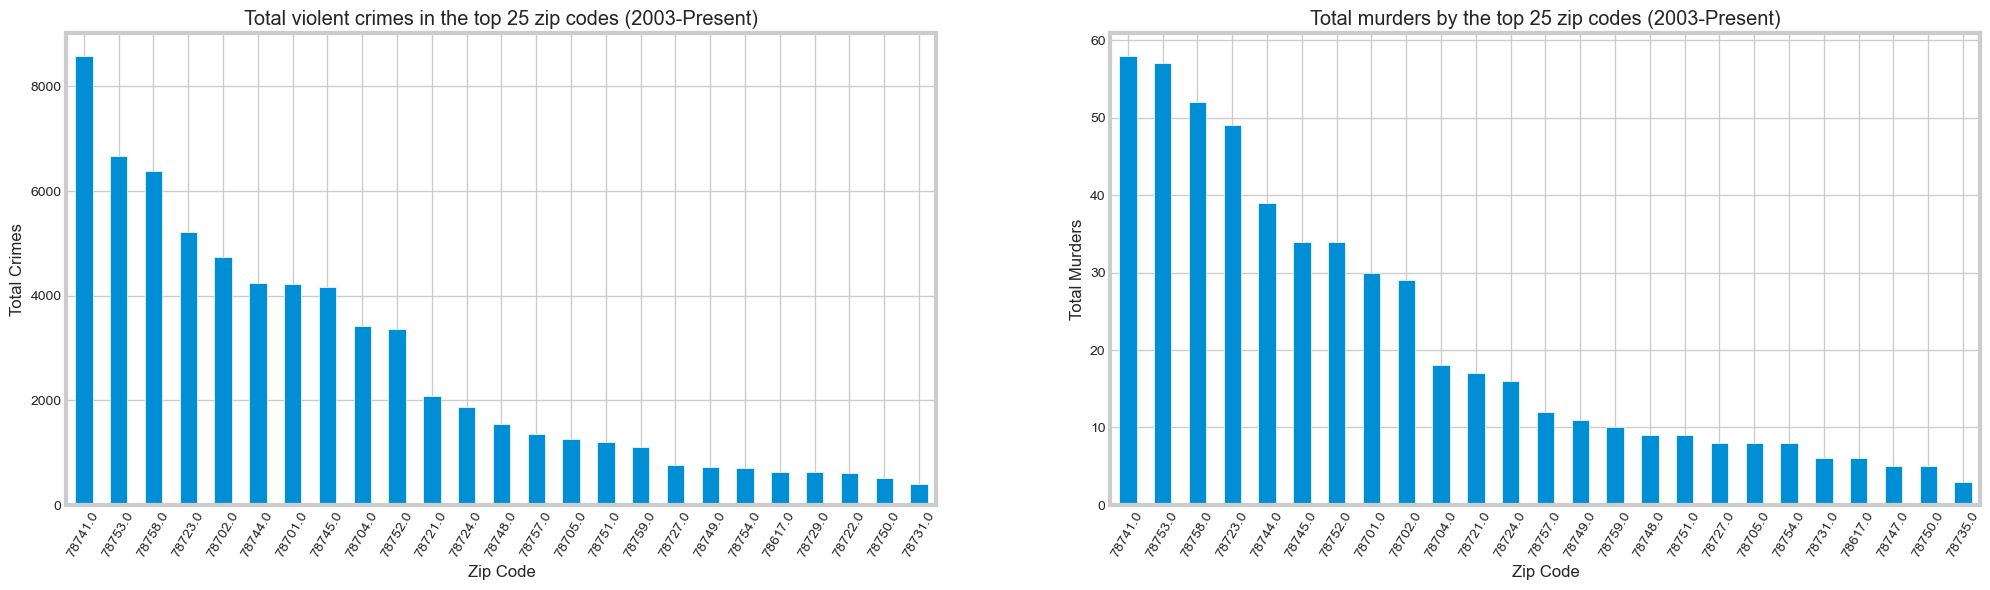

category_description  Aggravated Assault  Murder  Rape  Robbery
zip_code                                                       
0.0                                    1       0     0        0
78610.0                                2       0     3        0
78613.0                               45       1    29       58
78617.0                              357       6   158      106
78621.0                                2       0     0        0
78634.0                                1       0     0        0
78640.0                                0       0     3        0
78641.0                                1       0     0        0
78645.0                                0       0     1        0
78652.0                                8       0     1        1
78653.0                               37       1     7        5
78660.0                              159       3    43       57
78664.0                                7       0     8        0
78669.0                                0       0     1        0
78681.0                                3       0     3        0
78701.0                             2066      30   774     1353
78702.0                             2441      29   617     1660
78703.0                              166       2    85      113
78704.0                             1641      18   780      990
78705.0                              499       8   449      313
78712.0                                1       0     3        0
78717.0                              153       1    46       39
78719.0                               26       0     3       10
78721.0                             1306      17   311      446
78722.0                              270       3    98      241
78723.0                             2604      49   809     1749
78724.0                             1153      16   356      342
78725.0                               76       1    44       13
78726.0                              174       2    93       32
78727.0                              418       8   177      152
78728.0                               21       1    12        3
78729.0                              337       2   151      137
78730.0                               36       0    17        4
78731.0                              191       6   119       89
78732.0                                1       0     2        1
78733.0                                2       0     5        1
78735.0                              224       3    77       48
78736.0                               59       0    31       13
78737.0                                8       0     5        1
78738.0                                1       0     0        0
78739.0                               38       0    40        4
78741.0                             4159      58  1371     3001
78742.0                               83       2    21       24
78744.0                             2363      39   895      940
78745.0                             2242      34   862     1025
78746.0                              127       3    78      134
78747.0                              237       5    96       45
78748.0                              841       9   381      321
78749.0                              363      11   204      146
78750.0                              260       5   139      106
78751.0                              529       9   280      392
78752.0                             1640      34   494     1195
78753.0                             3371      57  1137     2098
78754.0                              390       8   158      145
78756.0                              156       2    99       97
78757.0                              686      12   236      418
78758.0                             3140      52  1096     2089
78759.0                              558      10   255      277

<Figure size 432x288 with 0 Axes>

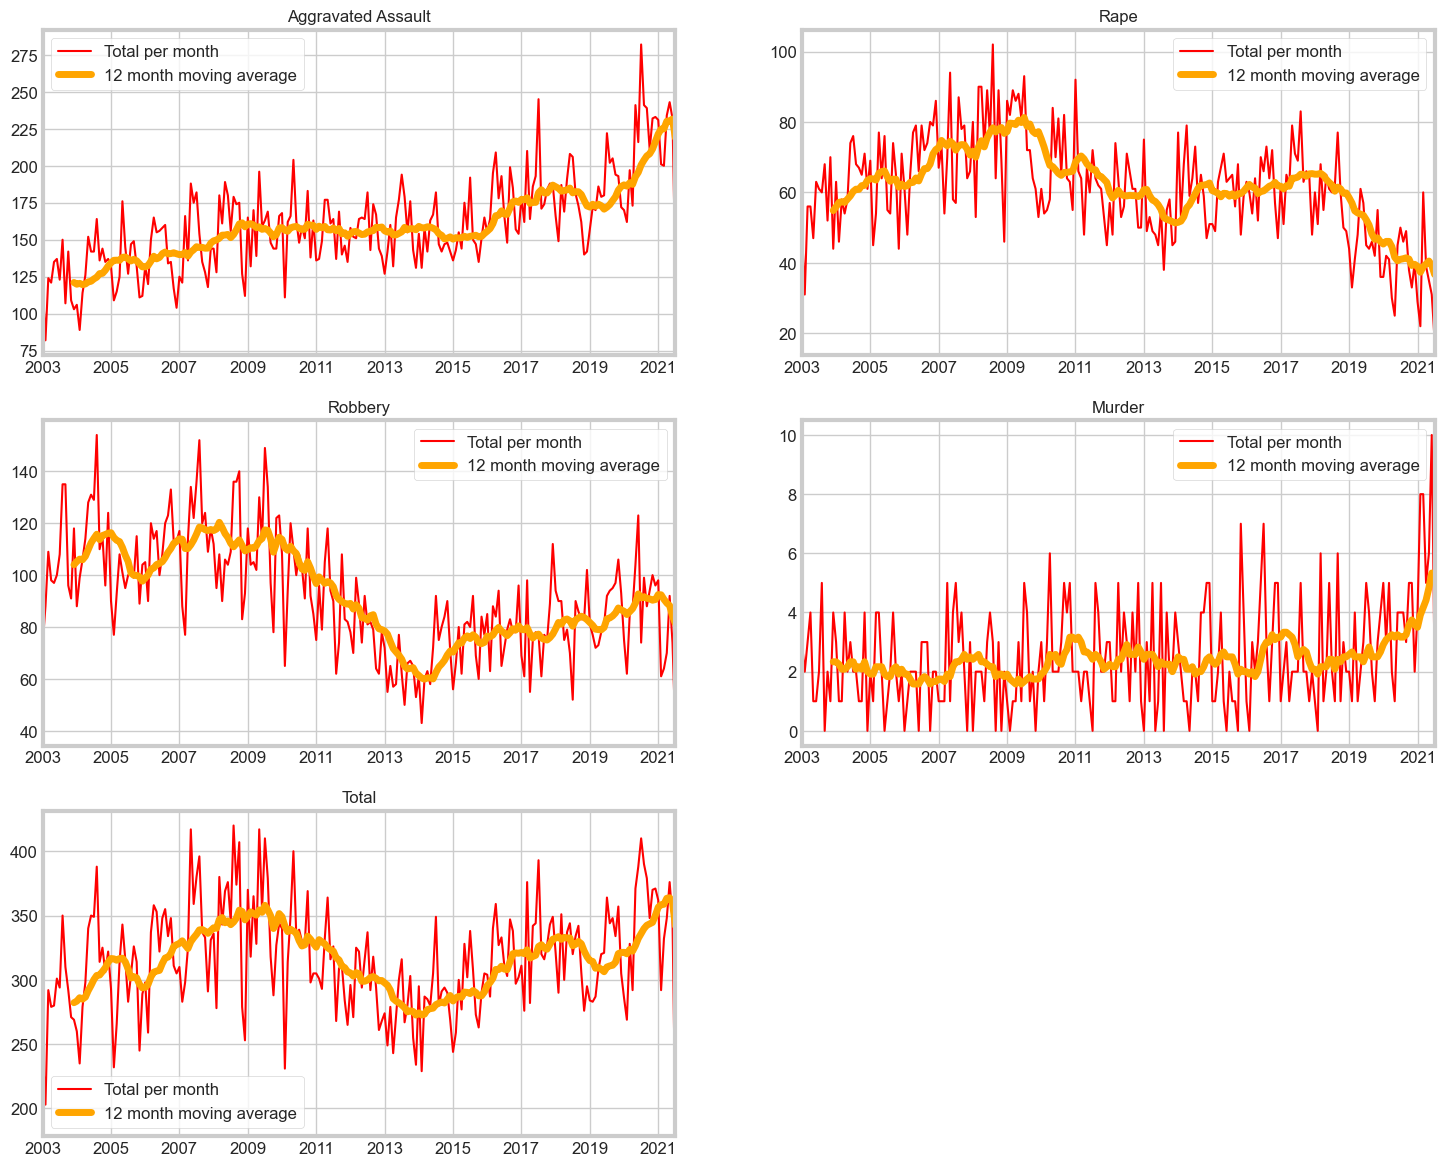

In [19]:
plt.figure(dpi=100)
plt.xlabel("Crime Type")
plt.ylabel("Total Incidents")
plt.xticks(rotation="60")
sb.countplot(df.category_description).set_title(
    "Total property & violent crimes (2003-Present)"
)
plt.show()

# display(df_viol.zip_code.value_counts(normalize=True).head(25))
display(df.category_description.value_counts())

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2, dpi=100)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Total violent crimes in the top 25 zip codes (2003-Present)",
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
    ax=axs[0],
)
df_mur.zip_code.value_counts().head(25).plot.bar(
    title="Total murders by the top 25 zip codes (2003-Present)",
    xlabel="Zip Code",
    ylabel="Total Murders",
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.category_description)
mur_freq = pd.crosstab(df_mur.zip_code, df_mur.category_description)
display(viol_freq)

monthly_viol = pd.DataFrame(
    df_viol[df_viol["category_description"] == "Aggravated Assault"]
    .resample("M")
    .size()
)
monthly_viol.columns = ["Aggravated Assault"]

for i in df_viol["category_description"].unique():
    monthly_viol[i] = pd.DataFrame(
        df_viol[df_viol["category_description"] == i].resample("M").size()
    )

monthly_viol["Total"] = monthly_viol.sum(axis=1)

ViolCrimeTypes = monthly_viol.columns

plt.figure(1)
plt.figure(figsize=(16, 25), dpi=100)

i = 521
for eachCrime in ViolCrimeTypes:
    plt.subplot(i)
    monthly_viol[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly_viol[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

viol_freq.to_csv("viol_freq.csv")

Currently, 78741 shares 13.07% of violent crime, followed by 78753, sharing 9.92%.


### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

<Figure size 600x400 with 0 Axes>

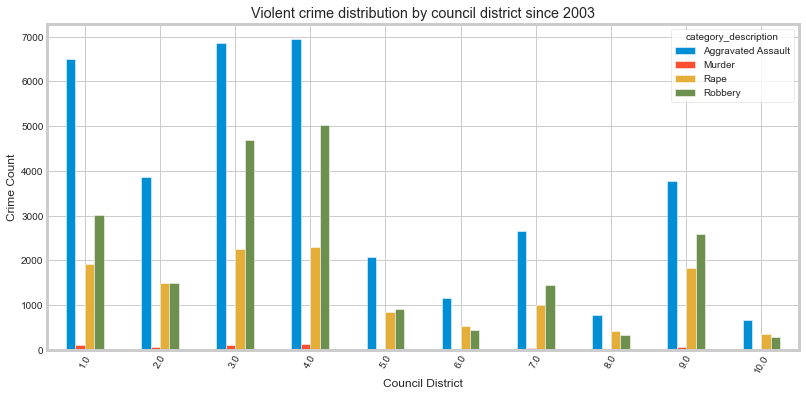

<Figure size 600x400 with 0 Axes>

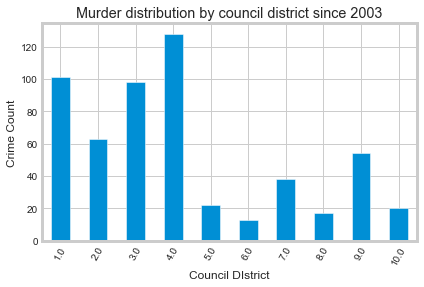

<Figure size 600x400 with 0 Axes>

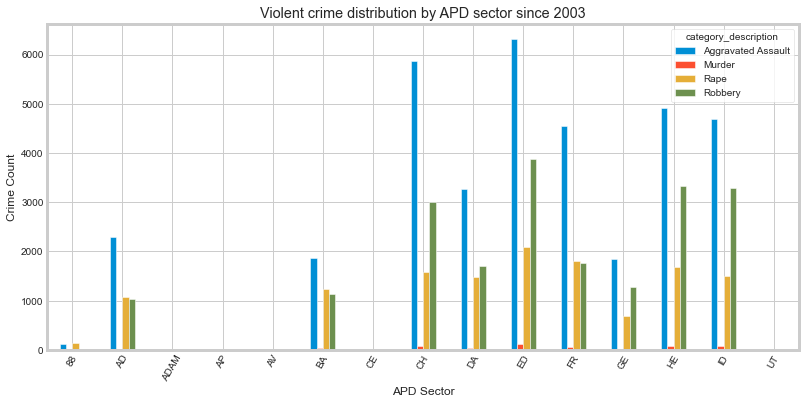

<Figure size 600x400 with 0 Axes>

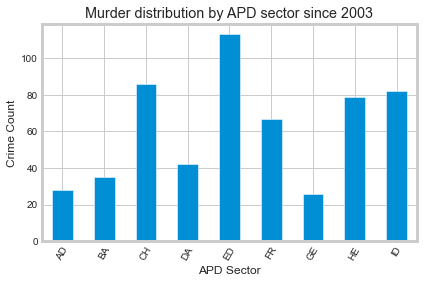

<Figure size 600x400 with 0 Axes>

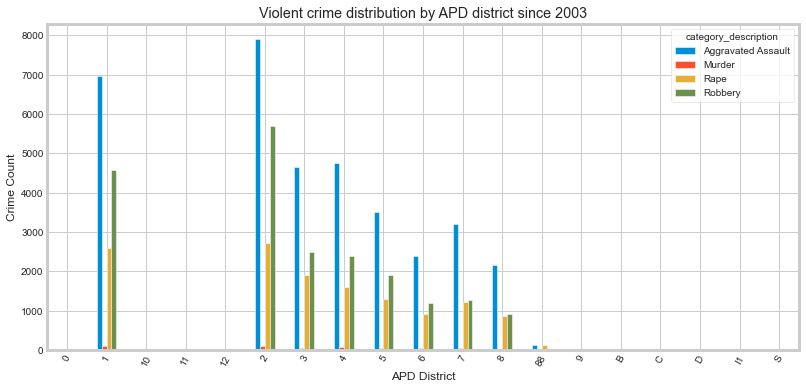

<Figure size 600x400 with 0 Axes>

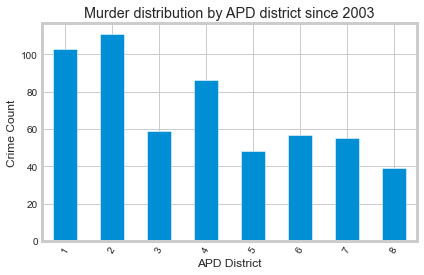

In [20]:
plt.figure(dpi=100)
pd.crosstab(df_viol.council_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    rot=60,
    xlabel="Council District",
    ylabel="Crime Count",
    title="Violent crime distribution by council district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.council_district, df_mur.category_description).plot.bar(
    rot=60,
    xlabel="Council DIstrict",
    ylabel="Crime Count",
    title="Murder distribution by council district since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_sector, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD sector since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_sector, df_mur.category_description).plot.bar(
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD sector since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_district, df_mur.category_description).plot.bar(
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD district since 2003",
    legend=False,
)
plt.show()

### K. Violent crime and murder distribution by location type

category_description                            Aggravated Assault  Murder  \
location_type                                                                
ABANDONED/CONDEMNED STRUCTURE                                   21       1   
AMUSEMENT PARK                                                   1       0   
ARENA / STADIUM / FAIRGROUNDS / COLISEUM                         2       0   
ATM SEPARATE FROM BANK                                           2       0   
AUTO DEALERSHIP NEW / USED                                      13       0   
BANKS / SAVINGS & LOAN                                          17       1   
BAR / NIGHT CLUB                                               758      12   
CAMP / CAMPGROUND                                               44       0   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                            34       1   
COMMERCIAL / OFFICE BUILDING                                   409       9   
COMMUNITY CENTER                                                11       0   
CONSTRUCTION SITE                                               38       0   
CONVENIENCE STORE                                              288       4   
DAYCARE FACILITY                                                 0       0   
DEPARTMENT / DISCOUNT STORE                                     62       0   
DRUG STORE / DR. OFFICE / HOSPITAL                             123       6   
FIELD / WOODS                                                  291      19   
GAMBLING FACILITY / CASINO / RACE TRACK                         10       1   
GAS / SERVICE STATIONS                                         273       6   
GOVERNMENT / PUBLIC BUILDING                                   113       2   
GROCERY / SUPERMARKET                                           72       2   
HOTEL / MOTEL / ETC.                                           780      15   
INDUSTRIAL SITE                                                  5       0   
JAIL / PRISON                                                    6       0   
LAKE / WATERWAY                                                 10       1   
LIQUOR STORE                                                     9       1   
OTHER / UNKNOWN                                                471      13   
PARK / PLAYGROUND                                              188       1   
PARKING LOTS / GARAGE                                         4922     104   
RENTAL STORAGE FACILITY                                         20       1   
RESIDENCE / HOME                                             17844     238   
REST AREA                                                        2       0   
RESTAURANTS                                                    258       3   
SCHOOL - COLLEGE / UNIVERSITY                                    5       0   
SCHOOL - ELEMENTARY / SECONDARY                                 11       0   
SCHOOLS / COLLEGES                                              43       2   
SHELTER-MISSION / HOMELESS                                      23       0   
SHOPPING MALL                                                    9       0   
SPECIALTY  STORE (TV  FUR ETC.)                                 52       0   
STREETS / HWY / ROAD / ALLEY                                  8396     112   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)                 110       1   
TRIBAL LANDS                                                     0       0   

category_description                            Rape  Robbery  
location_type                                                  
ABANDONED/CONDEMNED STRUCTURE                     14       12  
AMUSEMENT PARK                                     1        2  
ARENA / STADIUM / FAIRGROUNDS / COLISEUM           0        0  
ATM SEPARATE FROM BANK                             0        9  
AUTO DEALERSHIP NEW / USED                         2        2  
BANKS / SAVINGS & LOAN                            10      398  
BAR / NIGHT CLUB                                 161   

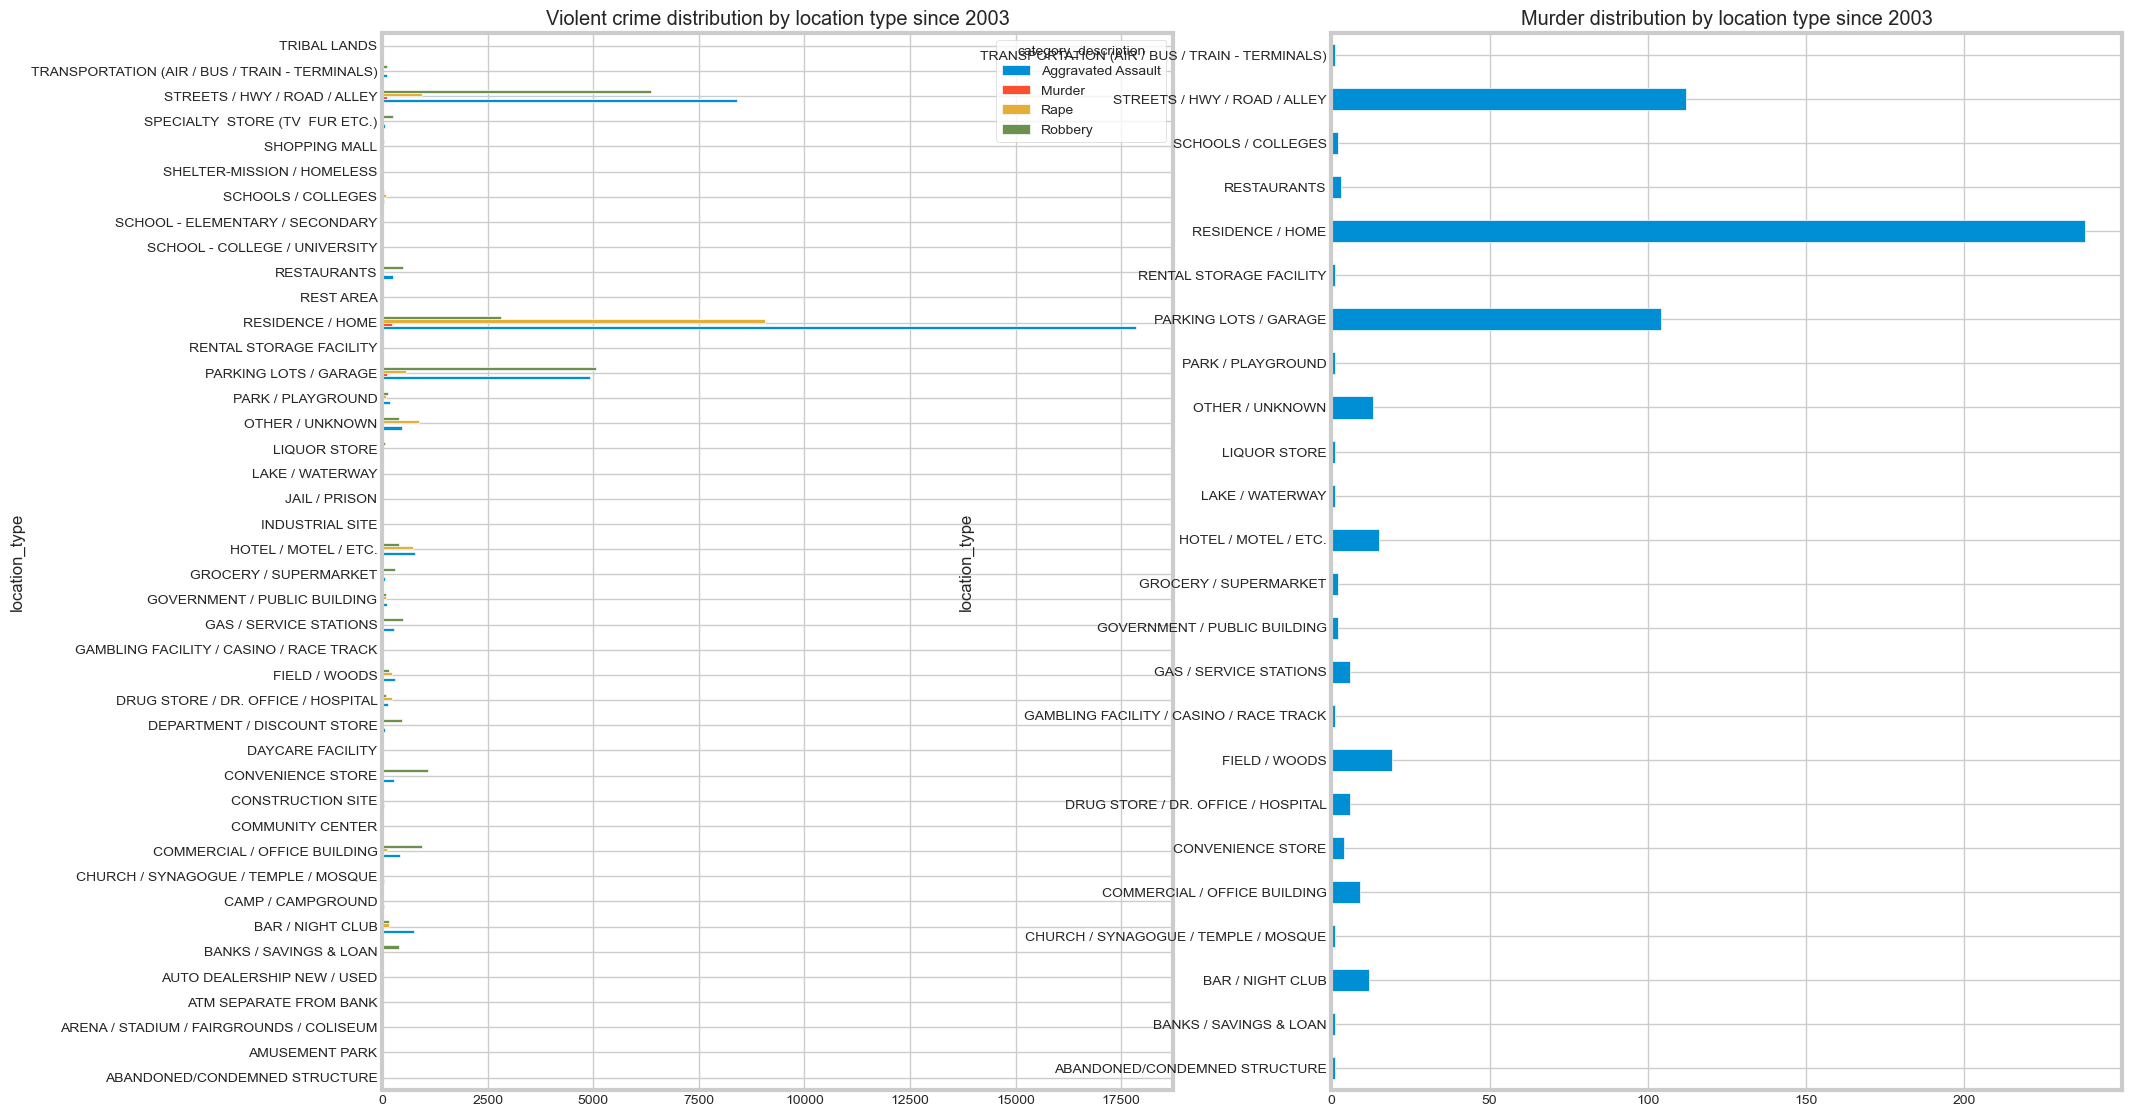

In [21]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.category_description)
display(viol_loc)

mur_loc = pd.crosstab(df_mur.location_type, df_mur.category_description)

fig, axs = plt.subplots(figsize=(20, 14), dpi=100, ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003", ax=axs[0],
)
mur_loc.plot.barh(
    title="Murder distribution by location type since 2003", legend=False, ax=axs[1]
)
plt.show()


viol_loc.to_csv("viol_loc.csv")

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [22]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Robbery 

In [23]:
agg_robbery_coords_heat = df_robbery[
    (df_robbery["latitude"].isnull() == False)
    & (df_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [24]:
mur_coords_heat = df_mur[
    (df_mur["latitude"].isnull() == False) & (df_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [25]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(50).to_frame()

address
00 BLOCK UNKNOWN                    163
900 BLOCK E 32ND ST                 146
1137 GUNTER ST                      143
1030 NORWOOD PARK BLVD              135
500 E 7TH ST                        131
6409 SPRINGDALE RD                  131
1700 BURTON DR                      126
1071 CLAYTON LN                     116
9024 NORTHGATE BLVD                 111
6103 MANOR RD                       110
9200 NORTH PLZ                      107
1054 SPRINGDALE RD                  103
1124 RUTLAND DR                     103
2901 S CAPITAL OF TEXAS HWY NB       97
9601 MIDDLE FISKVILLE RD             96
5800 TECHNI CENTER DR                94
9515 N LAMAR BLVD                    93
1000 E 41ST ST                       92
12151 N IH 35 SVRD NB                91
1500 FARO DR                         91
6118 FAIRWAY ST                      90
10000 N LAMAR BLVD                   90
700 BLOCK E 8TH ST                   88
7020 GRAND CANYON DR                 88
8800 N IH 35 SVRD SB                 87
1515 WICKERSHAM LN                   85
9300 NORTHGATE BLVD                  84
2237 E RIVERSIDE DR                  84
2401 S LAKESHORE BLVD                84
2500 BLOCK S CONGRESS AVE            83
9010 GALEWOOD DR                     81
8312 N IH 35 SVRD SB                 80
2201 WILLOW CREEK DR                 79
7000 DECKER LN                       79
1300 CROSSING PL                     79
6855 E US 290 HWY SVRD EB            79
3909 N IH 35 SVRD NB                 77
9001 NORTHGATE BLVD                  75
1845 BURTON DR                       75
2400 WICKERSHAM LN                   74
1601 ROYAL CREST DR                  73
8926 N LAMAR BLVD                    72
4900 BLOCK MUELLER BLVD              72
4404 E OLTORF ST                     72
2101 BURTON DR                       71
2005 WILLOW CREEK DR                 69
1600 WICKERSHAM LN                   69
2200 S PLEASANT VALLEY RD            68
3603 SOUTHRIDGE DR                   68
4700 E RIVERSIDE DR                  67

In [26]:
# Show addresses with 2 or more reported murders
df_mur.address.value_counts().head(35).to_frame()

address
6407 SPRINGDALE RD               3
6409 SPRINGDALE RD               3
4700 E RIVERSIDE DR              3
8800 N IH 35 SVRD SB             3
601 E 15TH ST                    3
8610 N LAMAR BLVD                3
7000 DECKER LN                   2
11105 N IH 35 SVRD NB            2
7100 N IH 35 SVRD SB             2
8912 N LAMAR BLVD                2
4900 E OLTORF ST                 2
9036 N LAMAR BLVD                2
6600 ED BLUESTEIN BLVD SB        2
201 W 5TH ST                     2
6118 FAIRWAY ST                  2
2713 S CONGRESS AVE              2
9200 NORTH PLZ                   2
9220 N IH 35 SVRD SB             2
1711 RUTLAND DR                  2
9010 GALEWOOD DR                 2
10503 N LAMAR BLVD               2
200 BLOCK E 6TH ST               2
605 MASTERSON PASS               2
1200 BLOCK E 38TH HALF ST        2
1137 GUNTER ST                   2
815 W SLAUGHTER LN               2
2400 WICKERSHAM LN               2
8225 SAM RAYBURN DR              2
2508 E RIVERSIDE DR              2
2501 ANKEN DR                    2
9601 MIDDLE FISKVILLE RD         2
10610 MORADO CIR                 2
1050 SPRINGDALE RD               2
833 FAIRFIELD DR                 2
2915 S IH 35 SVRD NB             2

In [27]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")
df_21.to_csv("df_21.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")
df_viol_21.to_csv("df_viol_21.csv")

df_mur_17.to_csv("df_mur_17.csv")
df_mur_18.to_csv("df_mur_18.csv")
df_mur_19.to_csv("df_mur_19.csv")
df_mur_20.to_csv("df_mur_20.csv")
df_mur_21.to_csv("df_mur_21.csv")

df_viol.to_csv("df_viol.csv")
df_mur.to_csv("df_mur.csv")
df_agg_asslt.to_csv("df_agg_asslt.csv")
df_rape.to_csv("df_rape.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")